<a href="https://colab.research.google.com/github/HussainPythonista/Melonoma_Detection_CNN_Assignment/blob/main/Mohamed_Kalanthar_Hussain_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem statement: 

To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

There are 9 Category of Skin Cancers:

- Actinic keratosis
- Basal cell carcinoma
- Dermatofibroma
- Melanoma
- Nevus
- Pigmented benign keratosis
- Seborrheic keratosis
- Squamous cell carcinoma
- Vascular lesion

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries


In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import glob
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import image_dataset_from_directory
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, Activation


In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/drive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/drive


In [ ]:
#unziping the loaded folder
!unzip /content/drive/MyDrive/CNN_assignment.zip

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print("Train Data",image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print("Test Data",image_count_test)

Train Data 2239
Test Data 118


This assignment uses a dataset of about 2239 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = image_dataset_from_directory(data_dir_train,
                                        color_mode='rgb',
                                        batch_size=batch_size,
                                        validation_split = 0.2,
                                        subset = 'training',
                                        image_size=(img_height, img_width),
                                        shuffle=True,
                                        seed=123
                                       )

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = image_dataset_from_directory(data_dir_train,
                                        color_mode='rgb',
                                        batch_size=batch_size,
                                        validation_split = 0.2,
                                        subset = 'validation',                                      
                                        image_size=(img_height, img_width),
                                        shuffle=True,
                                        seed=123
                                       )

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [10]:
labels_np = np.empty(shape=(0,), dtype=np.int32)
images_np = np.empty(shape=(0, 180, 180, 3), dtype=np.float32)
for images, labels in train_ds.take(4):
    labels_np = np.hstack((labels_np, labels.numpy()))
    images_np = np.vstack((images_np, images.numpy()))

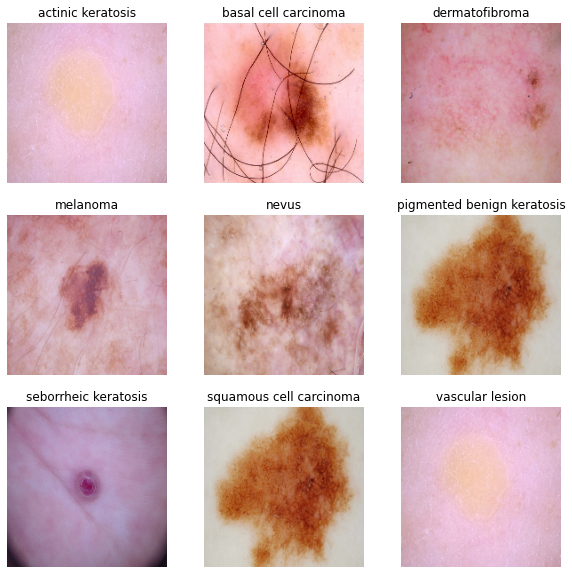

In [11]:


# show one random image for each class of the data

fig = plt.figure(figsize=(10, 10))
for i in range(len(class_names)):
    ax = plt.subplot(3, 3, i + 1)
    label_idx = np.where(labels_np[:]==i)[0]
    image_idx = images_np[label_idx,::]
    img_num = np.random.randint(label_idx.shape[0])
    plt.imshow(images_np[img_num].astype("uint8"))
    plt.title(class_names[i])
    plt.axis("off")
        
plt.show()           
### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [13]:
### Your code goes here


#Create Sequential Model first
model = keras.Sequential()

#Adding first layer with shape of 180*180*3 
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3))),

#Adding convolutions and MaxPOolLayer
#Here I'm going to use 4 Convolution and 4 Maxpool-layer

model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

#Flatten it before pass it to the fully connected Dense layes
model.add(Flatten())

# adding fully connected dense layer
model.add(Dense(128, activation='relu'))

# the output layer
model.add(Dense(len(class_names)))

In [14]:

#Summary of the created CNN Network
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Compile the model
Choose an appropirate optimiser and loss function for model training 

- I'm going to choose **Adam** as Optimizer, because Adam will give better result in Classification problems

- At the same time I'm going to use **SparseCategoricalCrossentropy** as loss

In [15]:
### Todo, choose an appropirate optimiser and loss function
#Model compilaion ie create optimizer, and loss for our problem
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [16]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Train the model

>This is initial fit of my model building building process,Here we didn't do anything for tuning we do it after fit the model

In [17]:
#Fittinng model with 20 epoches

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 25s 71ms/step - loss: 2.0019 - accuracy: 0.2433 - val_loss: 1.9539 - val_accuracy: 0.2483
Epoch 2/20
56/56 [==============================] - 1s 23ms/step - loss: 1.6859 - accuracy: 0.3934 - val_loss: 1.5661 - val_accuracy: 0.4586
Epoch 3/20
56/56 [==============================] - 1s 23ms/step - loss: 1.5147 - accuracy: 0.4693 - val_loss: 1.4599 - val_accuracy: 0.5235
Epoch 4/20
56/56 [==============================] - 1s 23ms/step - loss: 1.3877 - accuracy: 0.5067 - val_loss: 1.3859 - val_accuracy: 0.5436
Epoch 5/20
56/56 [==============================] - 1s 23ms/step - loss: 1.3328 - accuracy: 0.5340 - val_loss: 1.3943 - val_accuracy: 0.5213
Epoch 6/20
56/56 [==============================] - 1s 23ms/step - loss: 1.3866 - accuracy: 0.5084 - val_loss: 1.5340 - val_accuracy: 0.4430
Epoch 7/20
56/56 [==============================] - 1s 23ms/step - loss: 1.2297 - accuracy: 0.5608 - val_loss: 1.3659 - val_accuracy: 0.5369
Epoch 8/20
5

### Visualizing training results

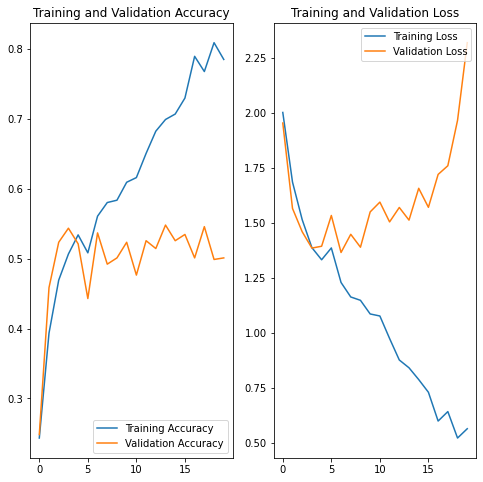

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

Observation:

- After fit our model we can clearly see that model is overfit beacuse,our accuracy is 75% and val_accuracy is 55%

- Our training model is increasing linearly, but my val_accuracy is stay around 55%

- This is clear sign of overfitting

**Overcome the Overfitting**

- I'm going to use data augmentation for overcome the overfitting

    In Data augmentation we will generate new images by flipping rottating or zooming.

### Write your findings here

**Data augmentation **

In [19]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
# work on data augementation

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2)
  ]
)

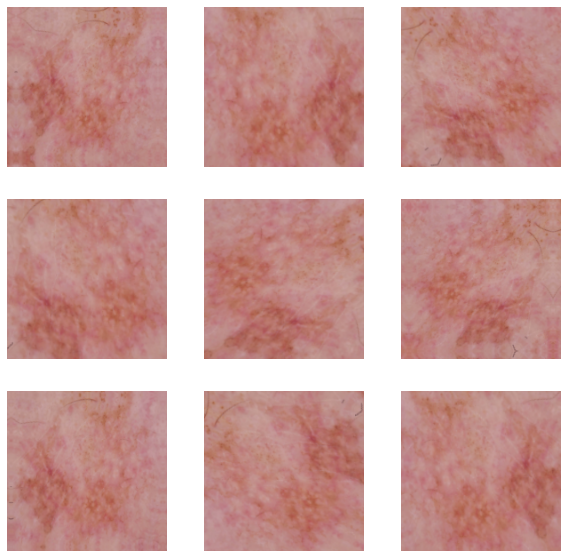

In [20]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [21]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
# define the layers of our CNN model

#Initial sequence Layer
model = keras.Sequential()

model.add(data_augmentation)
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3))),
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

# we will try to reduce overfitting by adding dropout
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(len(class_names)))


In [22]:
#Summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

### Compiling the model

In [23]:
## Your code goes here
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


### Training the model

In [24]:
## Your code goes here, note: train your model for 20 epochs
## We will train the model for 20 epochs

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 3s 29ms/step - loss: 2.0462 - accuracy: 0.2059 - val_loss: 1.9629 - val_accuracy: 0.2841
Epoch 2/20
56/56 [==============================] - 1s 25ms/step - loss: 1.8701 - accuracy: 0.3103 - val_loss: 1.7050 - val_accuracy: 0.4072
Epoch 3/20
56/56 [==============================] - 1s 25ms/step - loss: 1.7054 - accuracy: 0.3739 - val_loss: 1.6948 - val_accuracy: 0.3602
Epoch 4/20
56/56 [==============================] - 1s 25ms/step - loss: 1.5920 - accuracy: 0.4269 - val_loss: 1.6771 - val_accuracy: 0.4206
Epoch 5/20
56/56 [==============================] - 1s 25ms/step - loss: 1.5946 - accuracy: 0.4319 - val_loss: 1.5566 - val_accuracy: 0.4430
Epoch 6/20
56/56 [==============================] - 1s 25ms/step - loss: 1.4879 - accuracy: 0.4788 - val_loss: 1.6127 - val_accuracy: 0.4631
Epoch 7/20
56/56 [==============================] - 1s 25ms/step - loss: 1.4055 - accuracy: 0.5033 - val_loss: 1.4470 - val_accuracy: 0.5056
Epoch 8/20
56

### Visualizing the results

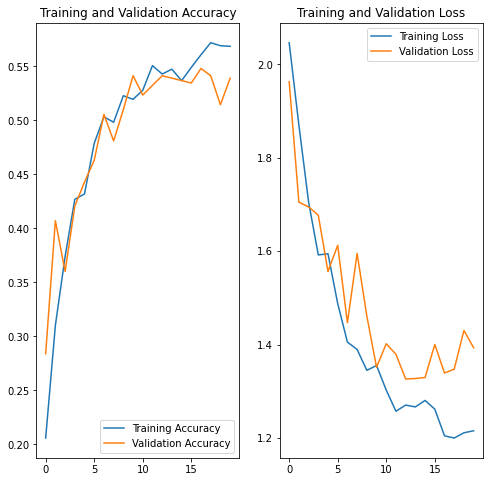

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

- After Data augmentation we fit our model,The model become generic ie it reduce the training accuracy and reduce the overfitting as well

- But the problem is the accuracy of both Train and test Dataset is very low it is been around 55%,this is not good 

- So i go further and check the class imbalance

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

**We are going to handle class imbalance**

In [26]:
## Your code goes here.
## a list of path of files in the training directory

path_list = []
for x in glob.glob(os.path.join(data_dir_train, '*', '*.jpg')):
  path_list.append(x)
lesion_list = [] 
for y in glob.glob(os.path.join(data_dir_train, '*', '*.jpg')):
  lesion_list.append(os.path.basename(os.path.dirname(y)))

dataframe_dict = dict(zip(path_list, lesion_list))

original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/Skin cancer ISIC The International Sk...,squamous cell carcinoma
1,/content/Skin cancer ISIC The International Sk...,squamous cell carcinoma
2,/content/Skin cancer ISIC The International Sk...,squamous cell carcinoma
3,/content/Skin cancer ISIC The International Sk...,squamous cell carcinoma
4,/content/Skin cancer ISIC The International Sk...,squamous cell carcinoma
...,...,...
2234,/content/Skin cancer ISIC The International Sk...,vascular lesion
2235,/content/Skin cancer ISIC The International Sk...,vascular lesion
2236,/content/Skin cancer ISIC The International Sk...,vascular lesion
2237,/content/Skin cancer ISIC The International Sk...,vascular lesion


In [27]:
# find the count of various cases cancerous conditions

original_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text major ticklabel objects>)

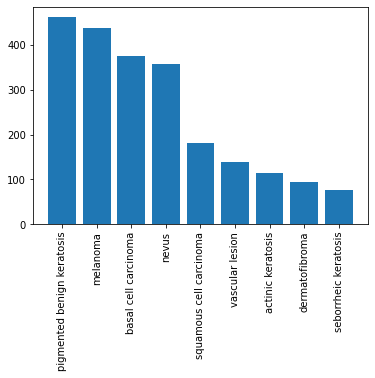

In [28]:

plt.bar(original_df['Label'].value_counts().keys(),height=original_df['Label'].value_counts().values)
plt.xticks(rotation=90)

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?

  * While visualize the distribution we can clearly see that The distribution of dermatofibroma,seborrheic keratosis is very low
  * At the same time distribution of squamous cell carcinoma,vascular lesion,actinic keratosis are also low but not too low as above category of disease
#### - Which classes dominate the data in terms proportionate number of samples?
  * While checking the plot of the distribution ,count of pigmented benign keratosis,melanoma,basal cell carcinoma,nevus,these counts are huge and these classes will dominate the data in terms proportionate number of samples

The distribution of classes clearly show that our dataset has data imbalance

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [29]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [30]:
path_to_training_dataset="/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(str(path_to_training_dataset) +"/"+ i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA9A0C192D0>: 100%|██████████| 500/500 [00:15<00:00, 31.82 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA99F0C4E50>: 100%|██████████| 500/500 [00:15<00:00, 32.49 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA99F389F10>: 100%|██████████| 500/500 [00:15<00:00, 31.39 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FA99F313210>: 100%|██████████| 500/500 [01:26<00:00,  5.76 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7FA99F389AD0>: 100%|██████████| 500/500 [01:19<00:00,  6.30 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA9B619A690>: 100%|██████████| 500/500 [00:16<00:00, 30.62 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FA99F069C50>: 100%|██████████| 500/500 [00:39<00:00, 12.72 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA99F00C110>: 100%|██████████| 500/500 [00:15<00:00, 31.98 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA99EFCDBD0>: 100%|██████████| 500/500 [00:16<00:00, 31.22 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [31]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [32]:
path_list_new = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/ISIC_0027753.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/ISIC_0028499.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/ISIC_0031738.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/ISIC_0030953.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/ISIC_0025069.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/ISIC_0029067.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/ISIC_0031043.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/ISIC_0030986.jpg',
 '/content/Skin cancer I

In [33]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carc

In [34]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [35]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [36]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [37]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [38]:
data_dir_train="/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train"#Folder which i stored my data
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ="training", ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [39]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ="validation", ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

Here We are going to create sequential model with dropouts and BatchNormalization

We create this model after data Augmentation

**New steps:** 

- I'm going to add **Dropouts** for get rid off overfitting
- Adding **Batchnormalization** as well
- I'm going to add extra one layer to improve my accuracy
-

In [40]:
# # define the layer of CNN model

#Initialize with sequence layer
model = keras.Sequential()
# normalization layer for bring values between 0 to 1
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3))),

#Layer
# Here I'm going to add 4 Layers with dropouts and Batch Normalization
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization()),
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization()),

#Flatten the Layers
model.add(Flatten())
#Adding the dense layer and adding dropouts as well
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

# Final Layer
model.add(Dense(len(class_names)))

In [41]:
## get summary of the model

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 90, 90, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_9 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 45, 45, 32)      

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

**Adding learning Rate**

- Adding better Learning Rate will help us to achieve better accuracy

In [42]:
#Compile the Network
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

#### **Todo:**  Train your model

In [43]:
#Fiting model with 30 epochs

epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 36s 204ms/step - loss: 1.6994 - accuracy: 0.3924 - val_loss: 2.3298 - val_accuracy: 0.1299
Epoch 2/30
169/169 [==============================] - 23s 134ms/step - loss: 1.2085 - accuracy: 0.5562 - val_loss: 2.3072 - val_accuracy: 0.2428
Epoch 3/30
169/169 [==============================] - 24s 140ms/step - loss: 0.9802 - accuracy: 0.6443 - val_loss: 1.5363 - val_accuracy: 0.4417
Epoch 4/30
169/169 [==============================] - 23s 134ms/step - loss: 0.8142 - accuracy: 0.7114 - val_loss: 0.8966 - val_accuracy: 0.6756
Epoch 5/30
169/169 [==============================] - 23s 133ms/step - loss: 0.6845 - accuracy: 0.7624 - val_loss: 0.7056 - val_accuracy: 0.7528
Epoch 6/30
169/169 [==============================] - 23s 134ms/step - loss: 0.6023 - accuracy: 0.7852 - val_loss: 0.6413 - val_accuracy: 0.7877
Epoch 7/30
169/169 [==============================] - 23s 134ms/step - loss: 0.4945 - accuracy: 0.8318 - val_loss: 0.5788 - val_ac

#### **Todo:**  Visualize the model results

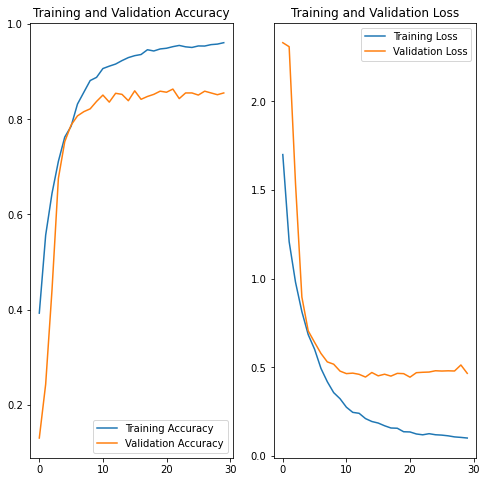

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



**Results**

- My final Model achieve the accuracy as **96%** in train and **86%** in validation

- And this result is far more better than previous accuracy **75%** as train and **55%** as val, because the train and val accuracy is very low and it is overfitting as well

- This shows that handling Data imbalance increased my model accuracy

- The final model accuracy between Val and Train is 10%,this is also indication  of overfitting but this is not that much high as previous one.

- We can achieve better results and reduce overfit as well,but it need extra computationl power, so I leave as it is

### It show the class rebalance increase my accuracy rate